<a href="https://colab.research.google.com/github/jholliday55/jholliday-ADVDS/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author Name: John Holliday Assignment Number: Project 5 Date: 2/28/2022 Purpose: The purpose of this assignment is to look at the data and read from a CSV. The data contains information about geometrical stats of letter. In this project we first create pipelines to handle missing data values. After that we plot label frequencies to show all the leter in the alphabet are well represented in this data set. Next, we create a handful of different classification models and score each model. After that we plot the accuracy of each model. We then plot the feature importances from the random forest to see what attributes were the most important. Next, we train a k-means model and plot the eblow and Silhouette score. To conclude, we plot a 3D graph of the two most important attributes from the feature importance plotted before.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sbn
import seaborn as sns

# Reads the CSV file, then prints the data types
df = pd.read_csv('https://raw.githubusercontent.com/bforoura/AML/master/letters.csv')

In [ ]:
df.dtypes

x-box     int64
y-box     int64
width     int64
high      int64
onpix     int64
x-bar     int64
y-bar     int64
x2bar     int64
y2bar     int64
xybar     int64
x2ybr     int64
xy2br     int64
x-ege     int64
xegvy     int64
y-ege     int64
yegvx     int64
class    object
dtype: object

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

# pipeline that is for numeric attributes                                       
number_cols=['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege',
             'xegvy', 'y-ege', 'yegvx']
number_transformer = Pipeline(steps=[
    # performs k nearest neighbor
    ('imputer', KNNImputer(n_neighbors=5)),
    # makes mean equal to zero and scales the data
    ('scaler', StandardScaler())
]) 

# create pipeline for onject types
object_cols = ['class']

object_transformer = Pipeline(steps = [
                                       # use most frequent imputer, can use mean, median, etc.
                                       ('imputer', SimpleImputer(strategy='most_frequent')),
                                       #  assigned int values
                                       ('ordinal', OrdinalEncoder())
])

# performs column transofrmation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', number_transformer, number_cols),
        ('obj', object_transformer, object_cols)
    ])

In [ ]:
df.isnull().sum()

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
class    0
dtype: int64

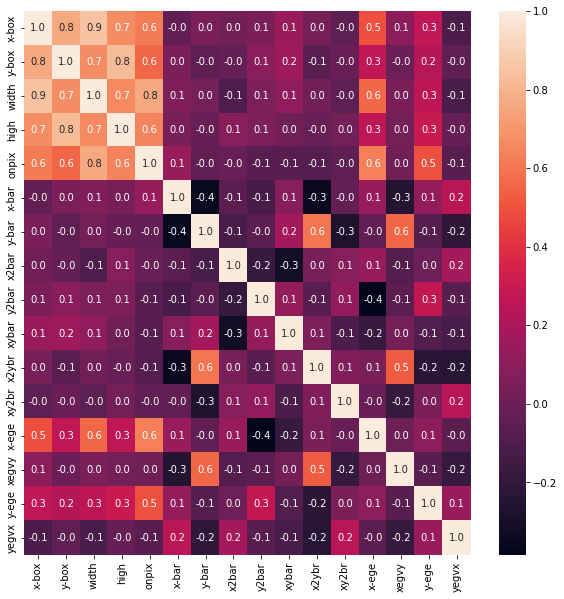

In [ ]:
# correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
# plot label frequencies to show that the letters A-Z are well represented.
# We can see that they are because they all have a similiar count
hist = px.histogram(df,x='class',color='class',template='plotly_dark')
hist.show()

In [ ]:
def cross_validate_model (classifier_model, X, y):
  kfold = KFold(n_splits=3, shuffle=True, random_state=10)

  # perform model cross validation on the shuffled folds
  results = cross_val_score(classifier_model, X, y, cv=kfold)

  # return the mean score for all folds
  return results.mean()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

x = df.drop('class', axis=1)
y = df['class']

# encode y
y = pd.DataFrame(df['class'])

enc = OrdinalEncoder()
enc.fit(y)
y = pd.DataFrame(enc.transform(y))

# gini decision tree then fit
gini_dt_clf = DecisionTreeClassifier(criterion='gini')
gini_dt_clf.fit(x, y)

# entropy decision tree then fit
entropy_dt_clf = DecisionTreeClassifier(criterion='entropy')
entropy_dt_clf.fit(x, y)

# random forest then fit
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(x, y)

# extra trees then fit
extra_trees_clf = ExtraTreesClassifier()
extra_trees_clf.fit(x, y)

# SGD then fit
SGD_clf = SGDClassifier()
SGD_clf.fit(x, y)

# svc RBF then fit
svc_rbf_clf = SVC(kernel='rbf')
svc_rbf_clf.fit(x, y)

# svc poly then fit
svc_poly_clf = SVC(kernel='poly')
svc_poly_clf.fit(x, y)

# logistic regression used for voting
log_reg_clf = LogisticRegression(random_state=42)

# svm scale used for voting
svm_scale_clf = SVC(gamma='scale', random_state=42, probability=True)

# voting classifier using voting as hard
voting_clf = VotingClassifier(estimators=[('lr', log_reg_clf), ('rf', random_forest_clf), ('svc', svm_scale_clf)], voting='soft')

# evaulates accuracy for each model
gini_dt_score = cross_validate_model(gini_dt_clf, x, y)

entropy_dt_score = cross_validate_model(entropy_dt_clf, x, y)

random_forest_score = cross_validate_model(random_forest_clf, x, y)

extra_trees_score = cross_validate_model(extra_trees_clf, x, y)

SGD_clf_score = cross_validate_model(SGD_clf, x, y)

svc_rbf_score = cross_validate_model(svc_rbf_clf, x, y)

svc_poly_score = cross_validate_model(svc_poly_clf, x, y)

voting_score = cross_validate_model(voting_clf, x, y)

0.926150197140608


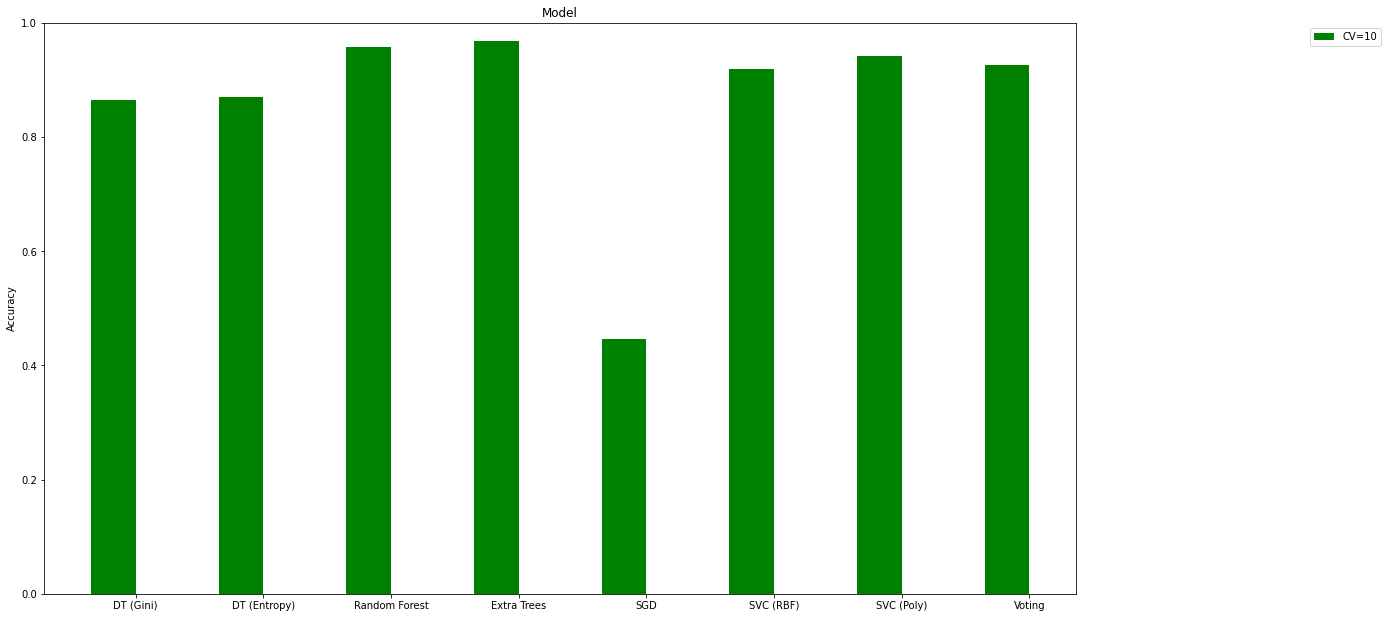

In [ ]:
# labels for the plot
labels = ['DT (Gini)', 'DT (Entropy)', 'Random Forest', 'Extra Trees', 'SGD', 'SVC (RBF)', 'SVC (Poly)', 'Voting']
# scores calultaed from each classification 
training_scores = [gini_dt_score, entropy_dt_score, random_forest_score, extra_trees_score, SGD_clf_score, svc_rbf_score, svc_poly_score, voting_score]

X = np.arange(len(labels))  
width = .35  

fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, training_scores, width, label='CV=10', color='green')
fig.set_size_inches(18.5, 10.5, forward=True)

ax.set_ylabel('Accuracy')
ax.set_xticks(X)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

# plots each models accuracy
plt.title('Model')
plt.show()

The voting classifier did not outperform all the other classifiers. However, it did have a high accuracy rating of around 93%. The voting classifier is using logistic regression, random forest, and SVM classifiers. The voting classifier choose the output that the majority of classifiers choose. A 93% accuracy rating is very high and it is hard to get much higher than that. 

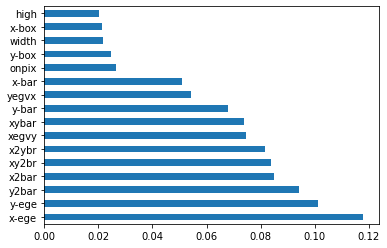

In [ ]:
# random forest classifier then plots feature importances
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(x, y)

(pd.Series(random_forest_clf.feature_importances_, index=x.columns)
   .nlargest(16)
   .plot(kind='barh'))

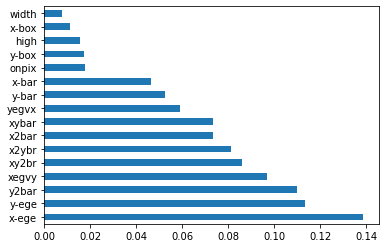

In [ ]:
# gini decision tree classifier then plots feature importances
dt_clf = DecisionTreeClassifier(criterion='gini')
dt_clf.fit(x, y)

(pd.Series(dt_clf.feature_importances_, index=x.columns)
   .nlargest(16)
   .plot(kind='barh'))

We can see that the most important features are x-ege and y-ege for both random forest and decision tree gini. All the tree models generally have the same main features with some small differences. Width, x-box, high, y-box, and onpix all scored in the lowest five in both classifications.

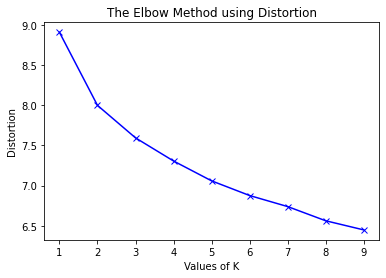

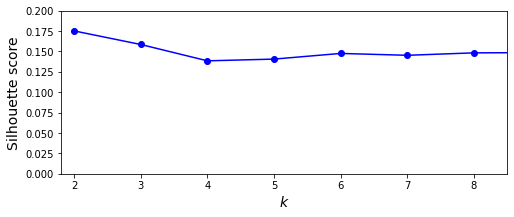

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

distortions = []
inertias = []
K = range(1, 10)
k = 4
 
for k in K:
    # fits x to model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
 
    # adds distortions and inertias
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)


plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Plot')
plt.show()

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                for k in range(1, 10)]

# calculates the silhouette scores
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0, 0.2])
plt.show()

We can see that there is an elbow when k = 4. This means that if there are less clusters than 4 it won't hurt the results and more clusters may have clusters into pieces. We see that the silhouette score is relatively low across all K and we see a dip when k = 4.

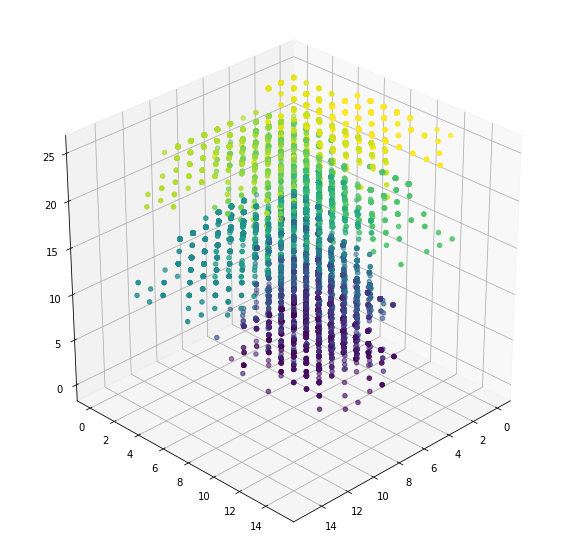

In [ ]:
import matplotlib.pyplot as plt

xdata = (df['x-ege'])
ydata = (df['y-ege'])
zdata = pd.DataFrame(df['class'])

enc = OrdinalEncoder()
enc.fit(zdata)
zdata = pd.DataFrame(enc.transform(zdata))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Set up data for three-dimensional scattered points; use the 26 labels for color map
ax.scatter3D(xdata, ydata, zdata,  c=zdata)

# rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()

# Summary
The first part of this project was to build pipelines to handle missing data. I did this by using an imputer KMN with nearest neighbors equal to 5 for all the columns besides the class column. For the class column, I used a simple imputer with the strategy of most frequent and ordinal encoder. After that, we confirm that no null values are present. We then plot a correlation heatmap to see what variables are highly correlated. 

After that, we plot label frequencies that show that the letters A-Z are all well represented in the dataset. 

Next up, we run our models and calculate the accuracy ratings for each model. We see that SGD has the lowest accuracy rating and extra trees have the highest accuracy rating. The voting classifier had an accuracy of around 92%. We used soft voting in this case. I found that it worked better than the hard voting. All the classifications had relatively high accuracy ratings. 

After that, we perform k means to the dataset and plot an elbow and silhouette score plots. We see that an elbow forms then k is equal to 4.
# Conclusion
The first step was preparing the data and building pipelines to handle missing data points. After that I plot the label frequencies in order to get the best understanding of the underlying data.

The goal of this project was to train classification models and plot their accuracy ratings. The models that we used were; Decision Tree (Gini), Decision Tree (Entropy), Random Forest, Extra Trees, SGD, SVC(RBF), SVC (Poly), and Voting. 

The voting classifier had an accuracy rating of 93% which is very high. The voting classifier uses logistic regression, random forest, and svc and chooses the majority of output. We use soft voting in this case. 

In conclusion we see how powerful the voting classification is when training datasets against it. I really learned a lot about each classification that we used and their strengths and weaknesses. I also learned a lot about running k-means against a dataset and plotting the elbow plot.

